In [6]:
# Note - dramatically reduced the parameters here.

from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 5000
max_len = 200
(x,y), (xtest,ytest) = imdb.load_data(num_words = max_features)
x = sequence.pad_sequences(x, maxlen = max_len)
xtest = sequence.pad_sequences(xtest, maxlen = max_len)

In [10]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 64, input_length = max_len))
model.add(layers.Conv1D(8, 5, activation = 'relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(8,3, activation = 'relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer = RMSprop(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['acc'])
hist = model.fit(x[:1000],y[:1000], epochs = 5, batch_size = 64, validation_split = 0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 200, 64)           320000    
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 196, 8)            2568      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 65, 8)             0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 63, 8)             200       
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 8)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 322,777
Trainable params: 322,777
Non-trainable params: 0
_________________________________________________________________
Trai

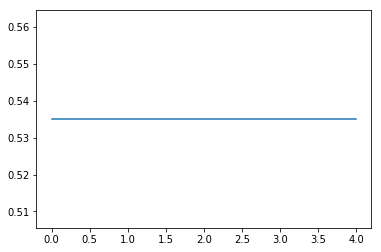

In [12]:
# Can also use CNN layers before an RNN layer, useful for preprocessing large sequences.
import matplotlib.pyplot as plt
plt.plot(hist.history['val_acc'])
plt.show()
model.save('imdb_1d_conv.h5')